<a href="https://colab.research.google.com/github/akcoguzhan/UludagCapstone/blob/main/okulcapstone2_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import librosa
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
# to play the audio files
from IPython.display import Audio
import plotly.graph_objects as go
import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization,LSTM
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/okulCapstone/features_3_sec.csv")
pd.set_option('display.float_format', lambda x: '%.8f' % x)

In [ ]:
sütun=['chroma_stft_mean',
 'rms_mean',
 'harmony_mean',
 'tempo',
 'mfcc1_mean',
 'mfcc2_mean',
 'mfcc3_mean',
 'mfcc4_mean',
 'mfcc5_mean',
 'mfcc6_mean',
 'mfcc7_mean',
 'mfcc8_mean',
 'mfcc9_mean',
 'mfcc10_mean',
 'mfcc11_mean',
 'mfcc12_mean',
 'mfcc13_mean',
 'mfcc14_mean',
 'mfcc15_mean',
 'mfcc16_mean',
 'mfcc17_mean',
 'mfcc18_mean',
 'mfcc19_mean',
 'mfcc20_mean',
 'label']

In [ ]:
data=data[sütun]

In [ ]:
Y=data["label"]
data.drop(columns=["label"],inplace=True)
X=data


In [ ]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
encoder.categories_


[array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
        'metal', 'pop', 'reggae', 'rock'], dtype=object)]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.25, random_state=20, shuffle=True,stratify=Y)


In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

In [ ]:
model=Sequential()

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.25))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'Adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 24, 256)           1536      
                                                                 
 batch_normalization_8 (Batc  (None, 24, 256)          1024      
 hNormalization)                                                 
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 12, 256)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 12, 128)           163968    
                                                                 
 batch_normalization_9 (Batc  (None, 12, 128)          512       
 hNormalization)                                                 
                                                      

In [ ]:

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
early_stop = EarlyStopping(monitor="val_accuracy", min_delta=0, patience=5, mode="auto")
callbacks=[learning_rate_reduction,early_stop]

In [ ]:
history=model.fit(x_train, y_train, batch_size=32, epochs=80, validation_data=(x_test, y_test), callbacks=callbacks)

Epoch 1/80
235/235 [==============================] - 3s 9ms/step - loss: 1.8363 - accuracy: 0.3735 - val_loss: 2.4272 - val_accuracy: 0.1541 - lr: 0.0010
Epoch 2/80
235/235 [==============================] - 2s 8ms/step - loss: 1.4452 - accuracy: 0.5008 - val_loss: 1.8816 - val_accuracy: 0.3231 - lr: 0.0010
Epoch 3/80
235/235 [==============================] - 2s 8ms/step - loss: 1.2937 - accuracy: 0.5545 - val_loss: 1.3473 - val_accuracy: 0.5180 - lr: 0.0010
Epoch 4/80
235/235 [==============================] - 2s 7ms/step - loss: 1.1988 - accuracy: 0.5900 - val_loss: 1.1160 - val_accuracy: 0.6145 - lr: 0.0010
Epoch 5/80
235/235 [==============================] - 2s 8ms/step - loss: 1.1043 - accuracy: 0.6205 - val_loss: 1.0738 - val_accuracy: 0.6277 - lr: 0.0010
Epoch 6/80
235/235 [==============================] - 2s 8ms/step - loss: 1.0841 - accuracy: 0.6251 - val_loss: 1.0339 - val_accuracy: 0.6537 - lr: 0.0010
Epoch 7/80
235/235 [==============================] - 2s 8ms/step - lo

In [ ]:
pred_test = model.predict(x_test)

y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)


79/79 [==============================] - 0s 2ms/step


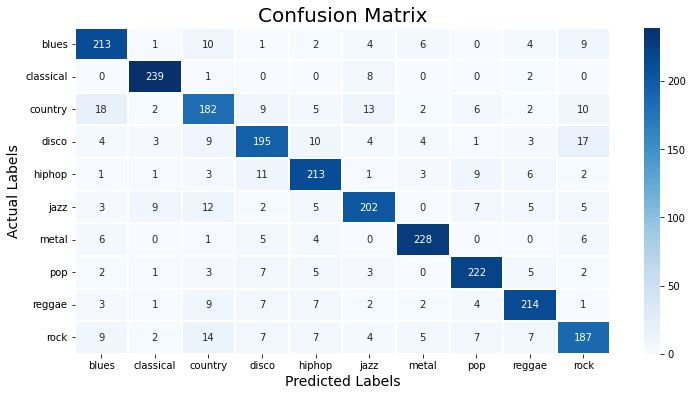

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 6))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       blues       0.82      0.85      0.84       250
   classical       0.92      0.96      0.94       250
     country       0.75      0.73      0.74       249
       disco       0.80      0.78      0.79       250
      hiphop       0.83      0.85      0.84       250
        jazz       0.84      0.81      0.82       250
       metal       0.91      0.91      0.91       250
         pop       0.87      0.89      0.88       250
      reggae       0.86      0.86      0.86       250
        rock       0.78      0.75      0.77       249

    accuracy                           0.84      2498
   macro avg       0.84      0.84      0.84      2498
weighted avg       0.84      0.84      0.84      2498



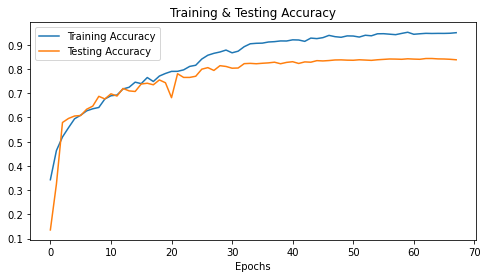

In [ ]:
epochs = [i for i in range(68) ]
fig , ax = plt.subplots(1,1)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(8,4)
"""ax.plot(epochs , train_loss , label = 'Training Loss')
ax.plot(epochs , test_loss , label = 'Testing Loss')
ax.set_title('Training & Testing Loss')
ax.legend()
ax.set_xlabel("Epochs")"""

ax.plot(epochs , train_acc , label = 'Training Accuracy')
ax.plot(epochs , test_acc , label = 'Testing Accuracy')
ax.set_title('Training & Testing Accuracy')
ax.legend()
ax.set_xlabel("Epochs")

plt.show()
